# EDA For Comment Toxicity 

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv("../data/processed/cleaned_train_data.csv")

In [3]:
print("Shape of train data: ", df.shape)

Shape of train data:  (159571, 9)


In [4]:
print("Columns : ", df.columns.tolist())

Columns :  ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'clean_comment']


### Missing Values

In [5]:
print("Missing Values : ", df.isna().sum())

Missing Values :  id                0
comment_text      0
toxic             0
severe_toxic      0
obscene           0
threat            0
insult            0
identity_hate     0
clean_comment    25
dtype: int64


In [6]:
df = df.dropna()

In [7]:
print("Missing Values : ", df.isna().sum())

Missing Values :  id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean_comment    0
dtype: int64


## Target Distribution

In [8]:
target_cols = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

## Count total toxic labels

In [9]:
df['toxic_count'] = df[target_cols].sum(axis=1)

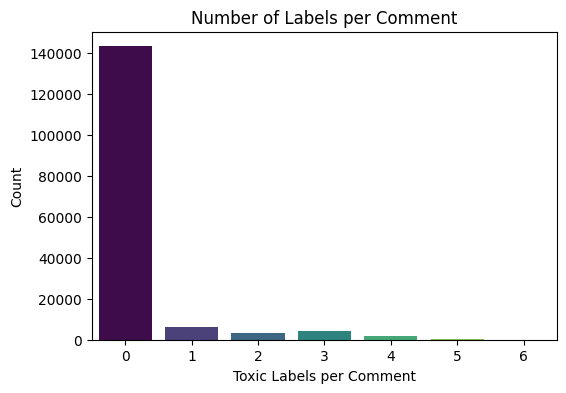

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="toxic_count", data=df, hue = 'toxic_count', legend= False,  palette="viridis")
plt.title("Number of Labels per Comment")
plt.xlabel("Toxic Labels per Comment")
plt.ylabel("Count")
plt.savefig("../Reports/Visuals/Number of Labels per Comment.png")
plt.show()

## Distribution of Each Label

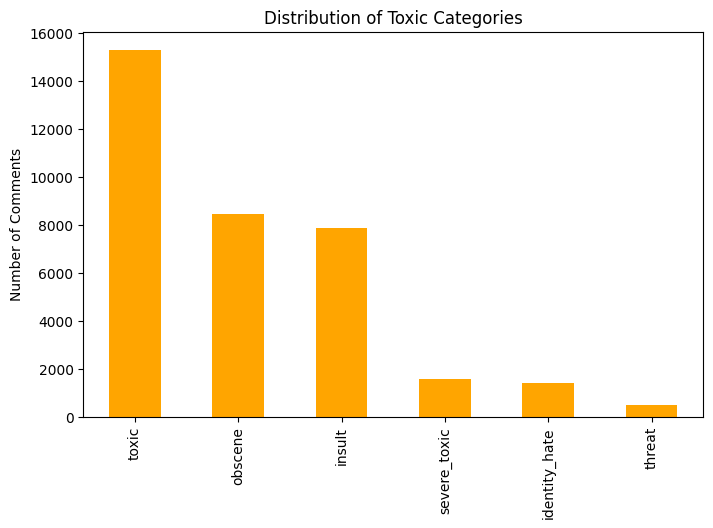

In [12]:
plt.figure(figsize=(8,5))
df[target_cols].sum().sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Distribution of Toxic Categories")
plt.ylabel("Number of Comments")
plt.savefig("../Reports/Visuals/Distribution of Toxic Categories.png")
plt.show()

## Comment Length Analysis

In [13]:
df["comment_length"] = df["comment_text"].astype(str).apply(len)

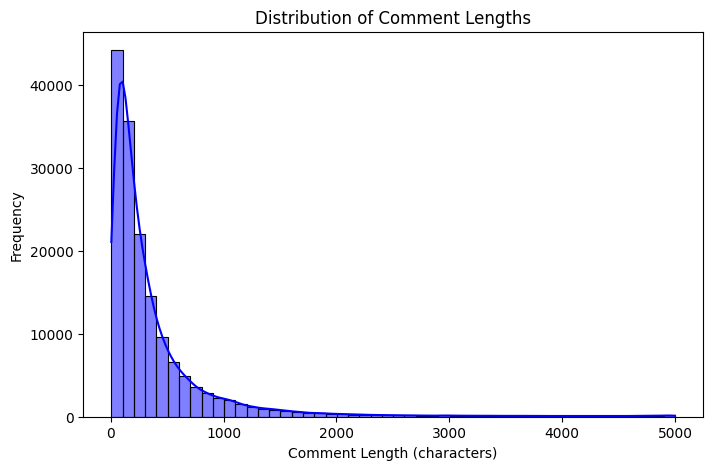

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["comment_length"], bins=50, kde=True, color="blue")
plt.title("Distribution of Comment Lengths")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.savefig("../Reports/Visuals/Distribution of Comment Lengths.png")
plt.show()

In [15]:
print("\nAverage Comment Length:", df["comment_length"].mean())
print("Max Comment Length:", df["comment_length"].max())
print("Min Comment Length:", df["comment_length"].min())


Average Comment Length: 394.1237636794404
Max Comment Length: 5000
Min Comment Length: 6


## Example Toxic vs Non-Toxic

In [16]:
print("\n🔹 Example Non-Toxic Comment:")
print(df[df["toxic_count"]==0]["comment_text"].iloc[0])


🔹 Example Non-Toxic Comment:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [17]:
print("\n🔹 Example Toxic Comment:")
print(df[df["toxic_count"]>0]["comment_text"].iloc[0])


🔹 Example Toxic Comment:
COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK


# 📊 EDA Summary – Comment Toxicity Dataset

## 1. Dataset Overview

- The training dataset contains ~160k comments with 6 toxicity labels (toxic, severe_toxic, obscene, threat, insult, identity_hate).

- No missing values were found in the comment_text or label columns.

## 2. Label Distribution

- The dataset is highly imbalanced. Most comments are non-toxic, while only a small fraction are labeled as toxic.

- Among toxic categories:

    - Toxic is the most common.

    - Severe Toxic and Threat are the rarest.

## 3. Multi-label Nature

- Many comments have 0 labels (non-toxic).

- Some comments belong to multiple toxic categories (e.g., toxic + insult).

- Distribution shows most toxic comments carry 1–2 labels.

## 4. Comment Length Analysis

- Average comment length: ~200 characters.

- Maximum comment length exceeds 5,000 characters (long text).

- Most comments are short, with a heavy tail of very long ones.

## 5. Example Insights

- Non-toxic comments are usually neutral or conversational.

- Toxic comments contain insults, offensive language, or hate speech.

## 📌 Conclusion:
The dataset is imbalanced, multi-label, and has variable comment lengths. These insights suggest using class balancing techniques (like weighted loss or oversampling) and robust tokenization (BERT handles long/variable text well).